In [1]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind, chi2_contingency, f_oneway, shapiro, levene, bartlett
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('insurance - insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Q1:  Do smokers have higher insurance charges than non-smokers?

## 1. State your Null Hypothesis and Alternative Hypothesis

- Null Hypothesis (H0): The mean insurance charges for smokers are equal to the mean insurance charges for non-smokers.
- Alternative Hypothesis (H1): The mean insurance charges for smokers are different from the mean insurance charges for non-smokers.

## 2. Select the correct test according to the data type and number of samples

- Independent two-sample t-test assuming unequal variances.

## 3. Test the assumptions of your selected test.

In [3]:
smokers = df[df['smoker'] == 'yes']['charges']
non_smokers = df[df['smoker'] == 'no']['charges']

In [4]:
_, p_value_normality_smokers = shapiro(smokers)
_, p_value_normality_non_smokers = shapiro(non_smokers)

In [5]:
# Equal Variance
_, p_value_variances = levene(smokers, non_smokers)

In [6]:
# Summary
if p_value_normality_smokers > 0.05 and p_value_normality_non_smokers > 0.05:
    print("Normality assumption satisfied for both groups.")
else:
    print("Normality assumption not satisfied for one or both groups. Consider non-parametric alternatives.")

if p_value_variances > 0.05:
    print("Equal variance assumption satisfied.")
else:
    print("Equal variance assumption not satisfied. Consider non-parametric alternatives.")

Normality assumption not satisfied for one or both groups. Consider non-parametric alternatives.
Equal variance assumption not satisfied. Consider non-parametric alternatives.


## 4. Execute the selected test, or the alternative test (if you do not meet the assumptions)

In [7]:
# t-test
t_stat, p_value_1 = ttest_ind(smokers, non_smokers, equal_var=False)

## 5. Interpret your p-value and reject or fail to reject your null hypothesis

In [8]:
# Interpretation
if p_value_1 < 0.05:
    print("Reject the null hypothesis. Smokers have significantly different insurance charges than non-smokers.")
else:
    print("Fail to reject the null hypothesis.")

Reject the null hypothesis. Smokers have significantly different insurance charges than non-smokers.


## 6. Show a supporting visualization that helps display the result

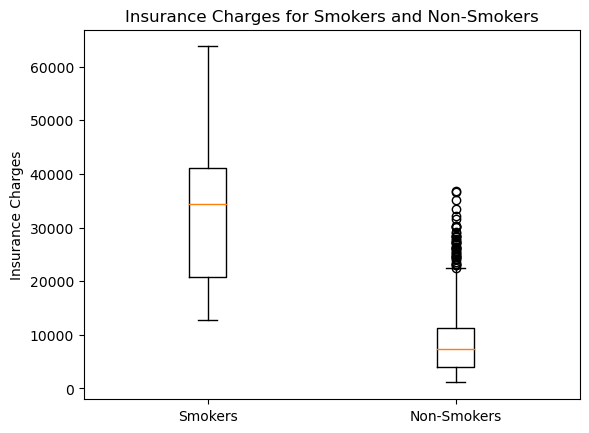

In [9]:
# Viz
plt.boxplot([smokers, non_smokers], labels=['Smokers', 'Non-Smokers'])
plt.ylabel('Insurance Charges')
plt.title('Insurance Charges for Smokers and Non-Smokers')
plt.show()

# Q2: Are men more likely to smoke than women?

## 1. State your Null Hypothesis and Alternative Hypothesis

- Null Hypothesis (H0): The proportion of smokers is the same for men and women.
- Alternative Hypothesis (H1): The proportion of smokers is different between men and women.

## 2. Select the correct test according to the data type and number of samples

- Chi-square test for independence.

## 3. Test the assumptions of your selected test.

## 4. Execute the selected test, or the alternative test (if you do not meet the assumptions)

In [10]:
# Create a contingency table
contingency_table = pd.crosstab(df['sex'], df['smoker'])

In [11]:
# Chi-square test
chi2_stat, p_value_2, dof, expected = chi2_contingency(contingency_table)

## 5. Interpret your p-value and reject or fail to reject your null hypothesis

In [12]:
# Interpretation
if p_value_2 < 0.05:
    print("Reject the null hypothesis. Smoking habits are significantly different between men and women.")
else:
    print("Fail to reject the null hypothesis.")

Reject the null hypothesis. Smoking habits are significantly different between men and women.


## 6. Show a supporting visualization that helps display the result

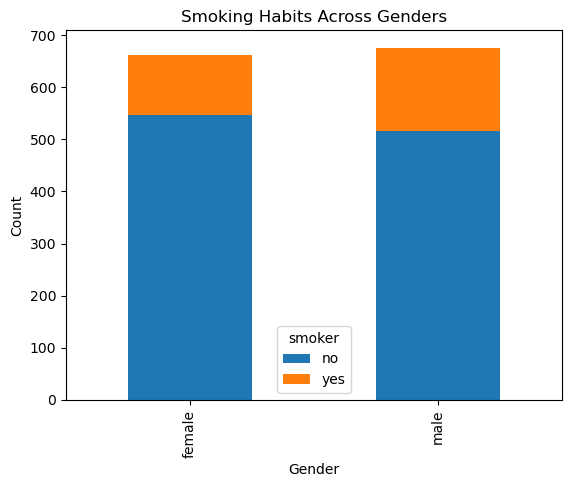

In [13]:
# Viz
contingency_table.plot(kind='bar', stacked=True)
plt.title('Smoking Habits Across Genders')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Q3. Do different regions have different charges, on average?

## 1. State your Null Hypothesis and Alternative Hypothesis

- Null Hypothesis (H0): The mean insurance charges are equal across all regions.
- Alternative Hypothesis (H1): The mean insurance charges are different across at least two regions.

## 2. Select the correct test according to the data type and number of samples

- Analysis of Variance (ANOVA).

## 3. Test the assumptions of your selected test.

In [14]:
# Equal Variance
_, p_value_3 = bartlett(df[df['region'] == 'southwest']['charges'],
                                 df[df['region'] == 'southeast']['charges'],
                                 df[df['region'] == 'northwest']['charges'],
                                 df[df['region'] == 'northeast']['charges'])

In [15]:
# Normality for each group
_, p_value_normality_southwest = shapiro(df[df['region'] == 'southwest']['charges'])
_, p_value_normality_southeast = shapiro(df[df['region'] == 'southeast']['charges'])
_, p_value_normality_northwest = shapiro(df[df['region'] == 'northwest']['charges'])
_, p_value_normality_northeast = shapiro(df[df['region'] == 'northeast']['charges'])

In [16]:
# Summary
if p_value_variances > 0.05:
    print("Equal variance assumption satisfied.")
else:
    print("Equal variance assumption not satisfied. Consider non-parametric alternatives.")

if all(p_value > 0.05 for p_value in [p_value_normality_southwest, p_value_normality_southeast, p_value_normality_northwest, p_value_normality_northeast]):
    print("Normality assumption satisfied for all regions.")
else:
    print("Normality assumption not satisfied for one or more regions. Consider non-parametric alternatives.")

Equal variance assumption not satisfied. Consider non-parametric alternatives.
Normality assumption not satisfied for one or more regions. Consider non-parametric alternatives.


## 4. Execute the selected test, or the alternative test (if you do not meet the assumptions)E

In [17]:
# ANOVA
f_stat, p_value_3 = f_oneway(df[df['region'] == 'southwest']['charges'],
                            df[df['region'] == 'southeast']['charges'],
                            df[df['region'] == 'northwest']['charges'],
                            df[df['region'] == 'northeast']['charges'])

## 5. Interpret your p-value and reject or fail to reject your null hypothesis

In [18]:
# Interpretation
if p_value_3 < 0.05:
    print("Reject the null hypothesis. Insurance charges are significantly different across regions.")
else:
    print("Fail to reject the null hypothesis.")

Reject the null hypothesis. Insurance charges are significantly different across regions.


## 6. Show a supporting visualization that helps display the result

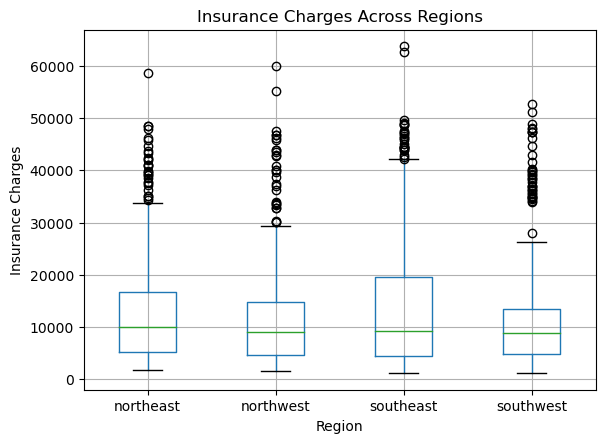

In [19]:
# Viz
df.boxplot('charges', by='region')
plt.title('Insurance Charges Across Regions')
plt.xlabel('Region')
plt.ylabel('Insurance Charges')
plt.suptitle('')
plt.show()